0、前一部分叫做Feature Extraction，后一部分叫做classification

1、每一个卷积核它的通道数量要求和输入通道是一样的。这种卷积核的总数有多少个和你输出通道的数量是一样的。

2、卷积(convolution)后，C(Channels)变，W(width)和H(Height)可变可不变，取决于是否padding和步长。subsampling(或pooling)后，C不变，W和H变。

3、卷积层：保留图像的空间信息。

4、卷积层要求输入输出是四维张量(B,C,W,H)，全连接层的输入与输出都是二维张量(B,Input_feature)。

[传送门 PyTorch的nn.Linear（）详解](https://blog.csdn.net/qq_42079689/article/details/102873766)

5、卷积(线性变换)，激活函数(非线性变换)，池化；这个过程若干次后，view打平，进入全连接层~

In [4]:
# 全连接层上述笔记中链接中的代码

import torch as t
from torch import nn

# in_features由输入张量的形状决定，out_features则决定了输出张量的形状 
connected_layer = nn.Linear(in_features = 64*64*3, out_features = 1)

# 假定输入的图像形状为[64,64,3]
input = t.randn(1,64,64,3)
print(input)
print(input.shape)

# 将四维张量转换为二维张量之后，才能作为全连接层的输入
input = input.view(1,64*64*3)
print(input.shape)
output = connected_layer(input) # 调用全连接层
print(output.shape)
print(output)

tensor([[[[ 1.6074e-01, -2.1983e+00, -1.3498e+00],
          [-1.6288e+00,  1.6993e-01,  8.5667e-01],
          [-2.5785e-01,  9.9901e-01, -1.1641e+00],
          ...,
          [ 2.1014e-01,  1.0807e+00,  7.8281e-01],
          [ 7.9861e-02,  4.7522e-01,  9.0917e-01],
          [ 2.1151e-01, -1.1167e+00,  3.5518e-01]],

         [[ 7.9597e-01,  8.5958e-02, -1.1751e-01],
          [ 1.3402e+00, -2.9195e-01,  1.2180e+00],
          [-1.1852e+00,  2.3586e-01,  1.7791e+00],
          ...,
          [-6.4000e-01, -7.4302e-01,  8.1343e-03],
          [-3.2826e+00,  1.2120e+00, -2.0846e-01],
          [-1.3988e-01, -5.9276e-01, -8.8324e-02]],

         [[-1.7943e+00,  1.0232e+00, -2.4528e+00],
          [-3.1778e-03,  5.6820e-01, -1.2045e-01],
          [ 8.8210e-01,  1.5284e+00,  4.2097e-01],
          ...,
          [-2.1543e-01, -4.9190e-01, -5.0861e-02],
          [-6.9866e-01,  8.8213e-01, -4.1411e-01],
          [-1.3956e+00,  3.4580e-02, -1.5417e+00]],

         ...,

         [[ 1.04

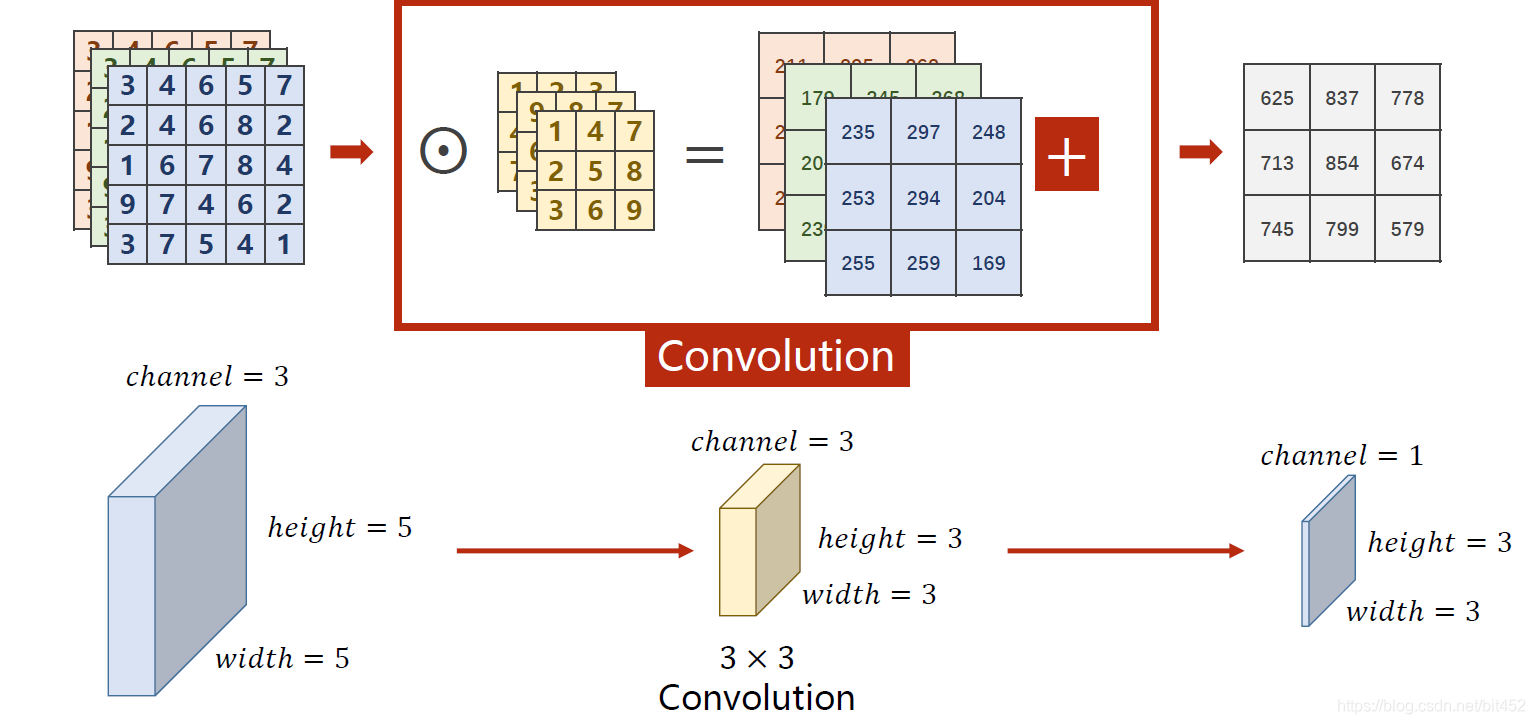

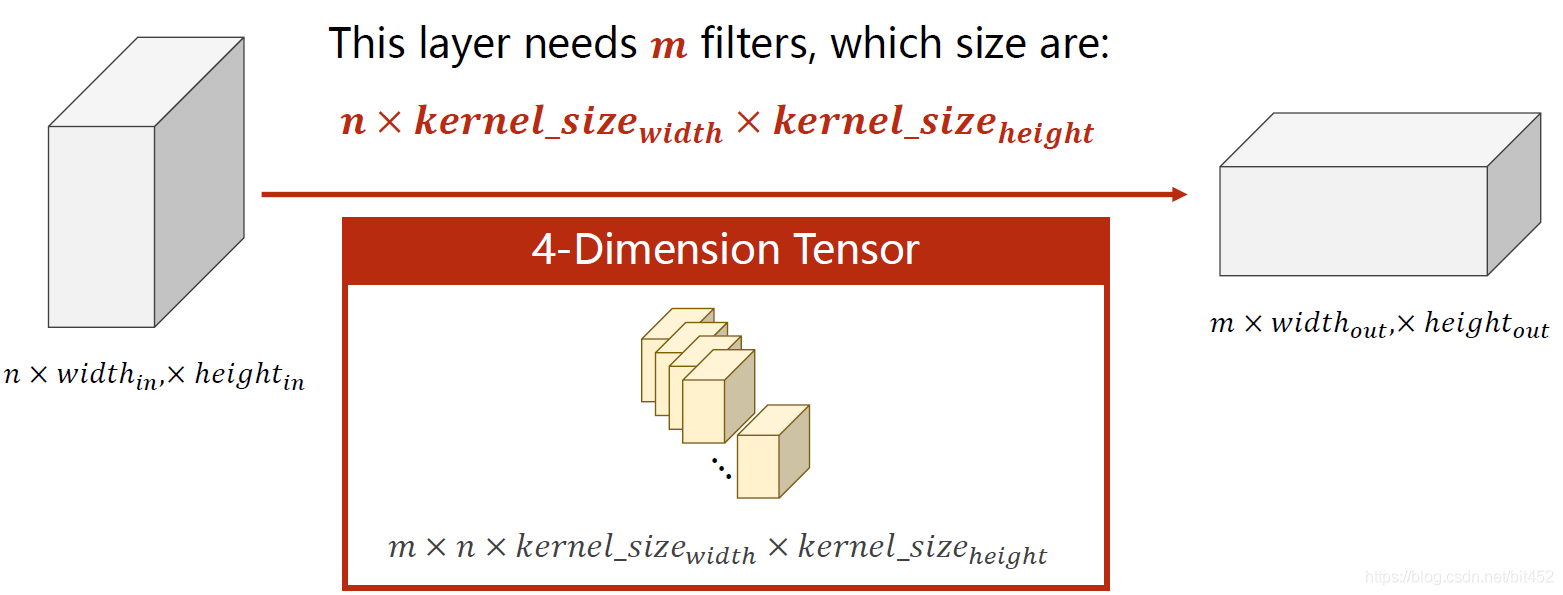

代码说明：

1、torch.nn.Conv2d(1,10,kernel_size=3,stride=2,bias=False)

  1是指输入的Channel，灰色图像是1维的；10是指输出的Channel，也可以说第一个卷积层需要10个卷积核；kernel_size=3,卷积核大小是3x3；stride=2进行卷积运算时的步长，默认为1；bias=False卷积运算是否需要偏置bias，默认为False。padding = 0，卷积操作是否补0。

2、self.fc = torch.nn.Linear(320, 10)，这个320获取的方式，可以通过x = x.view(batch_size, -1) # print(x.shape)可得到(64,320),64指的是batch，320就是指要进行全连接操作时，输入的特征维度。

In [6]:
import torch
 
in_channels, out_channels = 5, 10
width, height = 100, 100
kernel_size = 5
batch_size = 1
 

# 通道---可以想想成厚度
# 输入数据的设置：
# batch_size = 一次集合多少数据
# 输入通道数
# 数据平面的维度，宽和高
# 构建卷积层：
# 利用卷积核进行卷积操作：nn.Conv2d ：
# 输入通道，输出通道 卷积核的大小，就卷积核的平面层；

input = torch.randn(batch_size,
                    in_channels,
                    width,
                    height)
 
conv_layer = torch.nn.Conv2d(in_channels,
                             out_channels,
                             kernel_size=kernel_size)
 
output = conv_layer(input)
 
print(input.shape)
print(output.shape)
print(conv_layer.weight.shape)

torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 96, 96])
torch.Size([10, 5, 5, 5])


In [9]:
import torch
 
input = [3, 4, 6, 5, 7,
         2, 4, 6, 8, 2,
         1, 6, 7, 8, 4,
         9, 7, 4, 6, 2,
         3, 7, 5, 4, 1]
 

# （1， 1， 5， 5）--- batch， 通道， width，height
# 卷积核：输入通道， 输出通道， 卷积核3*3， padding = 1， 不设置偏置
# 重写卷积核参数
# 数据训练

input = torch.Tensor(input).view(1, 1, 5, 5)
 
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1,stride=1, bias=False)
 
kernel = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]).view(1, 1, 3, 3)
conv_layer.weight.data = kernel.data  # 卷积核自己做初始化，否则就是随机的
 
output = conv_layer(input)
print(output)

tensor([[[[ 91., 168., 224., 215., 127.],
          [114., 211., 295., 262., 149.],
          [192., 259., 282., 214., 122.],
          [194., 251., 253., 169.,  86.],
          [ 96., 112., 110.,  68.,  31.]]]], grad_fn=<ConvolutionBackward0>)


In [10]:
import torch
 

# 数据转换：batch，channel，width，height
# 卷积核2*2，MaxPool2d函数
# 搭建模型

input = [3, 4, 6, 5,
         2, 4, 6, 8,
         1, 6, 7, 8,
         9, 7, 4, 6,
         ]
input = torch.Tensor(input).view(1, 1, 4, 4)
 
maxpooling_layer = torch.nn.MaxPool2d(kernel_size=2)
 
output = maxpooling_layer(input)
print(output)

tensor([[[[4., 8.],
          [9., 8.]]]])


In [10]:
import torch
# 查看cud
print(torch.version.cuda)
torch.cuda.is_available()

11.6


True

In [9]:
#查看GPU使用情况
!nvidia-smi

Wed Sep  6 07:53:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:07.0 Off |                    0 |
| N/A   44C    P0    33W /  70W |   1290MiB / 15109MiB |     32%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
 
# prepare dataset
 
# batch=64；
# 数据转换函数--变张量
# 下载数据，取出训练数据，dataset.MNIST函数
# 数据打断设置batch,DataLoader
# 下载数据，取出测试数据，dataset.MNIST函数
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])
 
train_dataset = datasets.MNIST(root='dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
 
# design model using class
 

class Net(torch.nn.Module):
        # 搭建连接层
        # Conv2d(输入通道，输出通道，卷积核是 几乘几的)
        # MaxPool2d（2）   池化层   除以二；x y 维度上
        # Linear线性变换
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)
 
 
    def forward(self, x):
        # flatten data from (n,1,28,28) to (n, 784)
        # 获取x的第一个参数，返回给batch，即获取batch的大小
        # 先通过 卷积核（conv1） 进行卷积变换 - 进行 池化层（pooling）  - 再 正则化（relu）
        # 通过（conv2）卷积核 进行卷积变换 - 进行 池化层（pooling） - 再 正则化（relu）
        # 将做变换好的数据，拉长，变成一个 一维的数据。 - view（batch， -1） 一次处理batch个数据
        # 进行线性变换 - Linear 函数
        # :param x: 输入数据
        # :return: 输出数据
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(-1, 320) # -1表示需要根据其他的值进行推断 此处自动算出的是320,全连接层需要的batch*size
        # 这样写不行，因为会存在batch不满batch_size的数量，会导致输入维度部位320，运行报错
        # x = x.view(batch_size, -1)
        x = self.fc(x)
        return x

model = Net()
# 将模型迁移到cuda上计算，变成cudaTensor
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 
# training cycle forward, backward, update
 

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        # 将数据和模型放到同一张显卡和cuda上
        inputs, target = inputs.to(device),target.to(device)
        optimizer.zero_grad()
 
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device),labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy on test set: %d %% ' % (100*correct/total))
 
 
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

[1,   300] loss: 0.636
[1,   600] loss: 0.194
[1,   900] loss: 0.153
accuracy on test set: 96 % 
[2,   300] loss: 0.125
[2,   600] loss: 0.109
[2,   900] loss: 0.097
accuracy on test set: 97 % 
[3,   300] loss: 0.089
[3,   600] loss: 0.079
[3,   900] loss: 0.072
accuracy on test set: 97 % 
[4,   300] loss: 0.067
[4,   600] loss: 0.069
[4,   900] loss: 0.062
accuracy on test set: 97 % 
[5,   300] loss: 0.059
[5,   600] loss: 0.058
[5,   900] loss: 0.053
accuracy on test set: 98 % 
[6,   300] loss: 0.048
[6,   600] loss: 0.051
[6,   900] loss: 0.051
accuracy on test set: 98 % 
[7,   300] loss: 0.045
[7,   600] loss: 0.047
[7,   900] loss: 0.044
accuracy on test set: 98 % 
[8,   300] loss: 0.037
[8,   600] loss: 0.046
[8,   900] loss: 0.041
accuracy on test set: 98 % 
[9,   300] loss: 0.044
[9,   600] loss: 0.037
[9,   900] loss: 0.035
accuracy on test set: 98 % 
[10,   300] loss: 0.035
[10,   600] loss: 0.038
[10,   900] loss: 0.035
accuracy on test set: 98 % 


In [9]:
from torchvision import datasets

train_dataset = datasets.MNIST(root='dataset/mnist/', train=True, download=True, transform=transform)

print(len(train_dataset))

60000


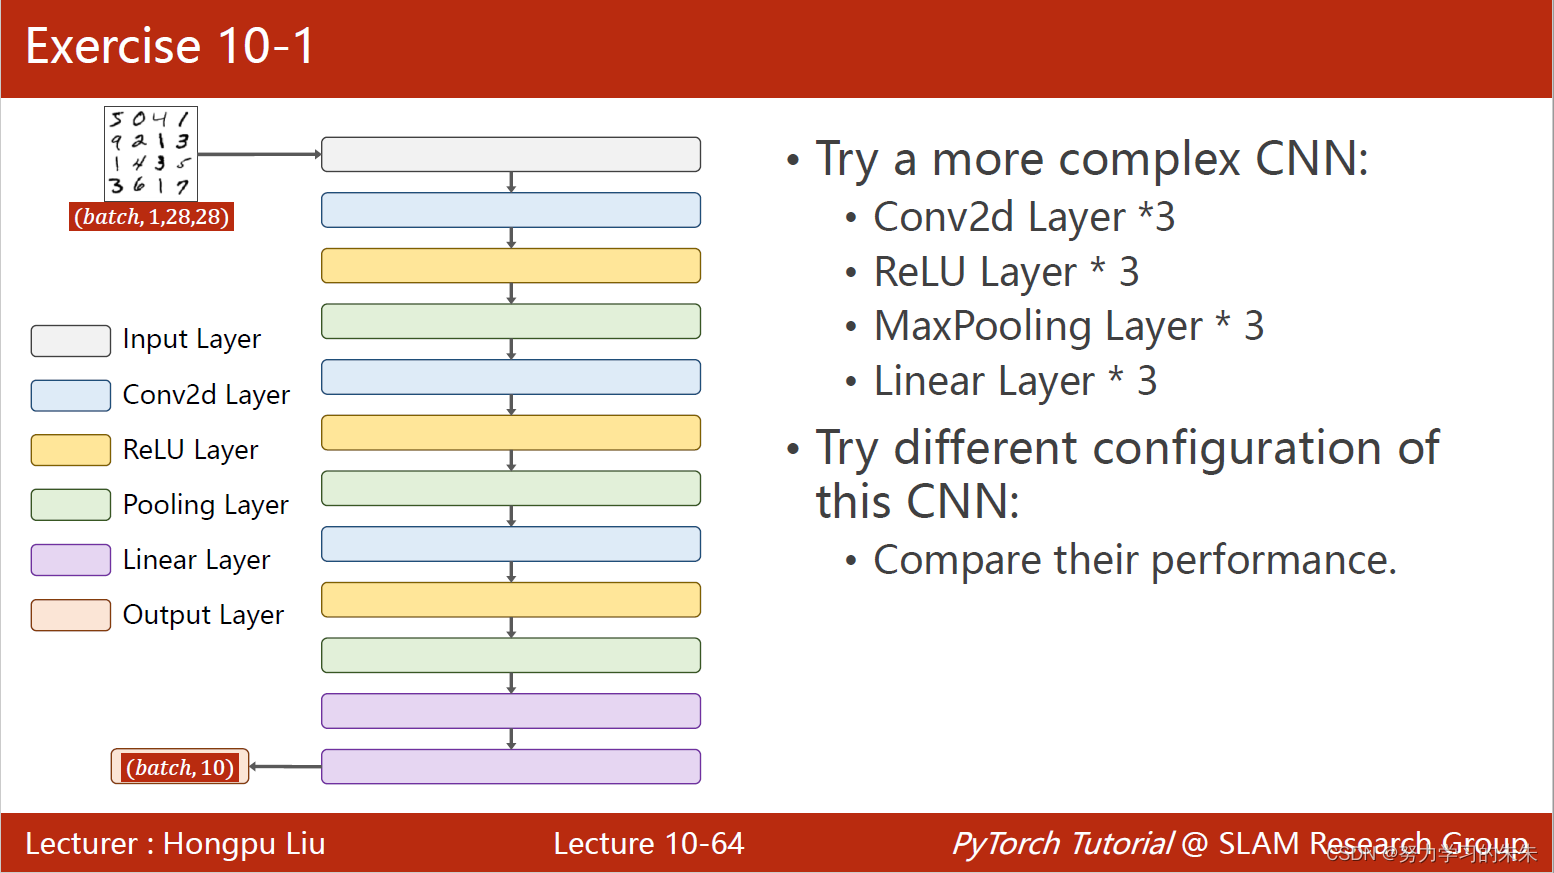

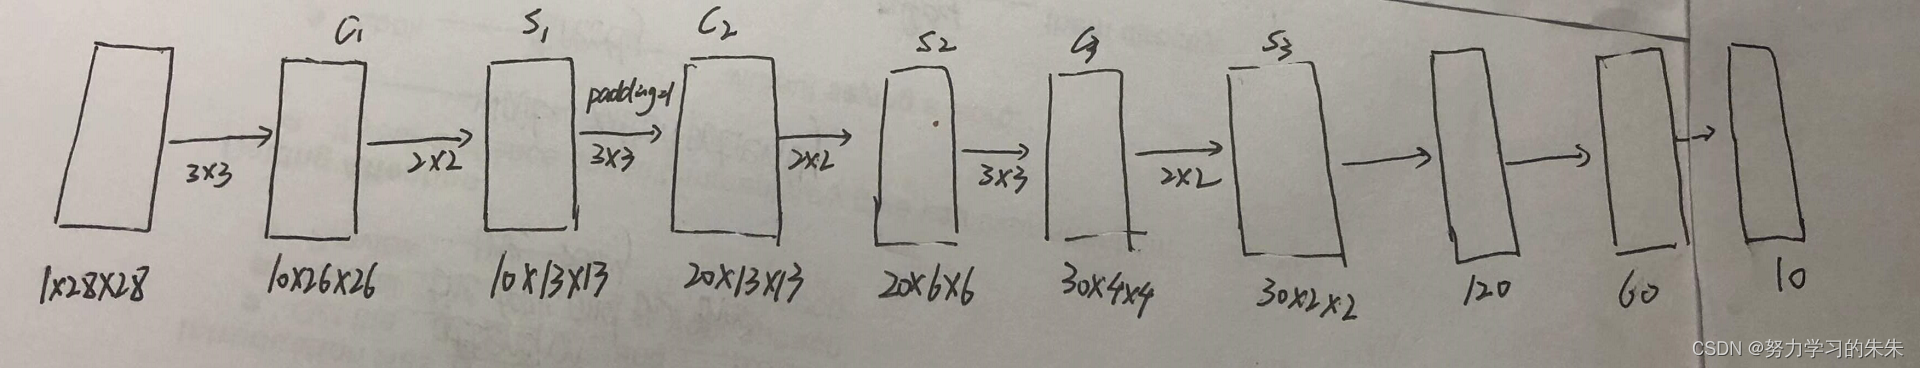

In [4]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
 

# batch=64；
# 数据转换函数--变张量
# 下载数据，取出训练数据，dataset.MNIST函数
# 数据打断设置batch,DataLoader
# 下载数据，取出测试数据，dataset.MNIST函数
# 数据不打断 设置batch

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307, ), (0.3081, ))
                                ])
 
train_dataset = datasets.MNIST(root='dataset/mnist',
                               train=True,
                               download=True,
                               transform=transform)
train_loader = DataLoader(train_dataset,
                          shuffle=True,
                          batch_size=batch_size)
 
test_dataset = datasets.MNIST(root='dataset/mnist',
                              train=False,
                              download=True,
                              transform=transform)
test_loader = DataLoader(test_dataset,
                         shuffle=False,
                         batch_size=batch_size)
 

class Net(torch.nn.Module):
    def __init__(self):
    
        # 搭建连接层
        # Conv2d(输入通道，输出通道，卷积核是 几乘几的)
        # MaxPool2d（2）   池化层   除以二；x y 维度上
        # Linear线性变换
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=3 ,padding=1)
        self.conv3 = torch.nn.Conv2d(20, 30, kernel_size=3)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc1 = torch.nn.Linear(120, 60)
        self.fc2 = torch.nn.Linear(60, 10)
 
    def forward(self, x):
        
        #Flatten data from (n, 1, 28, 28) to (n, 784)
        # 获取x的第一个参数，返回给batch，即获取batch的大小
        # 先通过 卷积核（conv1） 进行卷积变换 - 进行 池化层（pooling）  - 再 正则化（relu）
        # 通过（conv2）卷积核 进行卷积变换 - 进行 池化层（pooling） - 再 正则化（relu）
        # 将做变换好的数据，拉长，变成一个 一维的数据。 - view（batch， -1） 一次处理batch个数据
        # 进行线性变换 - Linear 函数
        # :param x: 输入数据
        # :return: 输出数据
        
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = F.relu(self.pooling(self.conv3(x)))
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
 
 
# 实例化Net类
# 判断在GPU还是cpu上跑，这里是在gpu上
# 将模型放在gpu上（to.(device)）
# 代价函数
# 优化器，初始化模型参数（权重，偏置），学习率0.01， 为了防止局部最优，在进行迭代时，再加一个函数，这里设置为0.5，和学习率一个等级

model = Net()
device = torch.device("cuda:0"if torch.cuda.is_available() else"cpu")
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        
        # train_loader 传出 batch的索引，即第几次数据， data当前数据
        # 将数据的特征和标签传给 inputs，和 target
        # 将数据传入gpu上
        # 优化器中的梯度设置为零
        # 将数据放入模型中
        # criterion计算损失值
        # .backward - 反向传播
        # 优化器函数进行更新权重
        # 将损失值进行累加 传给 running_loss函数
        # 输出第300次及300的倍数次的测试数据  --  第几次迭代， 当前的第几组数据，即第几个batch，当前损失和
        # 每300次，损失值做一个归结
        
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()
        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        
        # torch.no_grad()不用计算梯度
        # 对测试数据进行遍历
        # 将数据的 特征和标签 分别传给 images和labels
        # 数据传到gpu上
        # 带入模型进行预测 得到预测结果 - outputs
        # 这里是，我们取出概率最大的那个数作为输出
        # 取出标签的第一列， 进行累加，即计算总的数据集长度
        # 判断正确的数量，进行累加
        # 输出正确率
        
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
 
    print('Accuracy on test set: %d %%' % (100 * correct / total))
 
 
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

[1,   300] loss: 0.253
[1,   600] loss: 0.047
[1,   900] loss: 0.030
Accuracy on test set: 95 %
[2,   300] loss: 0.022
[2,   600] loss: 0.020
[2,   900] loss: 0.017
Accuracy on test set: 97 %
[3,   300] loss: 0.015
[3,   600] loss: 0.015
[3,   900] loss: 0.013
Accuracy on test set: 97 %
[4,   300] loss: 0.012
[4,   600] loss: 0.012
[4,   900] loss: 0.012
Accuracy on test set: 97 %
[5,   300] loss: 0.010
[5,   600] loss: 0.010
[5,   900] loss: 0.010
Accuracy on test set: 98 %
[6,   300] loss: 0.010
[6,   600] loss: 0.009
[6,   900] loss: 0.008
Accuracy on test set: 98 %
[7,   300] loss: 0.009
[7,   600] loss: 0.008
[7,   900] loss: 0.008
Accuracy on test set: 98 %
[8,   300] loss: 0.007
[8,   600] loss: 0.008
[8,   900] loss: 0.007
Accuracy on test set: 98 %
[9,   300] loss: 0.007
[9,   600] loss: 0.006
[9,   900] loss: 0.007
Accuracy on test set: 98 %
[10,   300] loss: 0.006
[10,   600] loss: 0.006
[10,   900] loss: 0.006
Accuracy on test set: 98 %


In [ ]:
! nvidia-smi